In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Add src to path to allow importing modules (Satisfies "Code Quality" requirement)
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [6]:
import pandas as pd
import os

# Check current directory
print(f"Current Working Directory: {os.getcwd()}")

# Define path
file_path = '../data/raw/data.csv'

# Check if file exists before trying to read
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("✅ Success! 'df' is now defined.")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
else:
    print(f"❌ ERROR: File not found at {file_path}")
    print("Please check: Did you put the 'data.csv' file inside the 'data/raw/' folder?")
    # Create an empty df just so the next cells don't crash with NameError (but you need to fix the file!)
    df = pd.DataFrame()

Current Working Directory: d:\isaac\educational purpose only\kifya\week 4\credit-risk-model\notebooks
✅ Success! 'df' is now defined.
Rows: 95662, Columns: 16


In [7]:
# Display first 5 rows
display(df.head())

# Check data types and non-null counts
print("\n--- Data Info ---")
df.info()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  

In [8]:
# Summary statistics for numerical columns
print("\n--- Numerical Summary ---")
display(df.describe())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


--- Numerical Summary ---


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



Number of duplicate rows: 0


In [9]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a dataframe for visualization
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print("\n--- Missing Values ---")
if not missing_df.empty:
    display(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 4))
    sns.barplot(x=missing_df.index, y=missing_df['Percentage'], palette='viridis')
    plt.title('Percentage of Missing Values by Feature')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No missing values found in the dataset.")


--- Missing Values ---
No missing values found in the dataset.


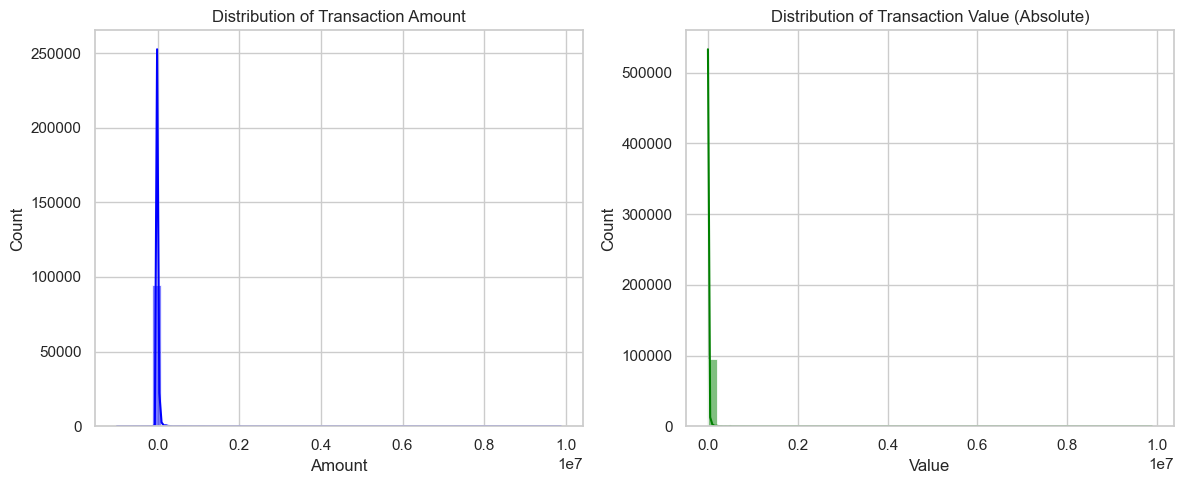

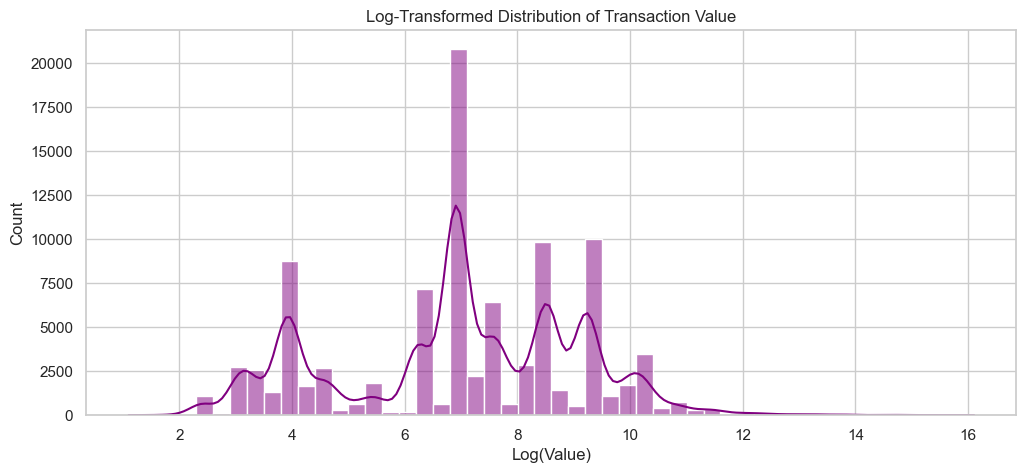

In [10]:
# Plot distribution of 'Amount'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amount')

# Plot distribution of 'Value' (Absolute Amount)
plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Value (Absolute)')

plt.tight_layout()
plt.show()

# Log transformation visualization to handle skewness
plt.figure(figsize=(12, 5))
sns.histplot(np.log1p(df['Value']), bins=50, kde=True, color='purple')
plt.title('Log-Transformed Distribution of Transaction Value')
plt.xlabel('Log(Value)')
plt.show()

C:\Users\isaac\AppData\Local\Temp\ipykernel_8556\1674763713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, order=order, palette='magma')


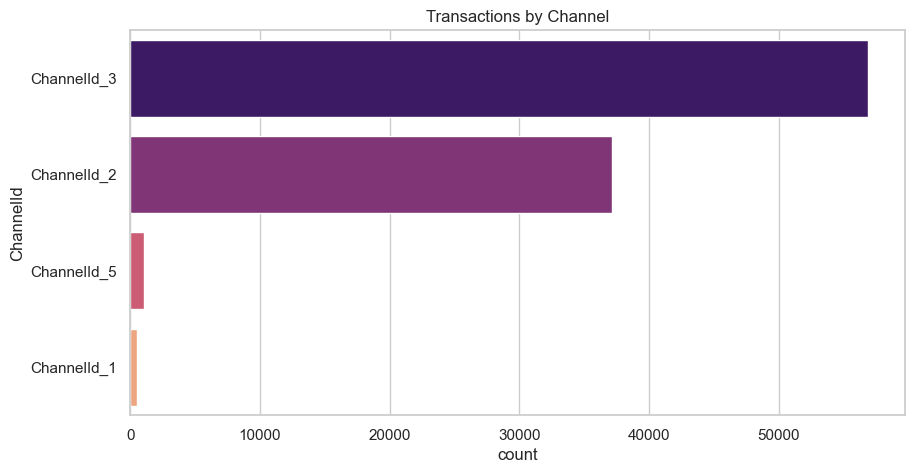

C:\Users\isaac\AppData\Local\Temp\ipykernel_8556\1674763713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, order=order, palette='magma')


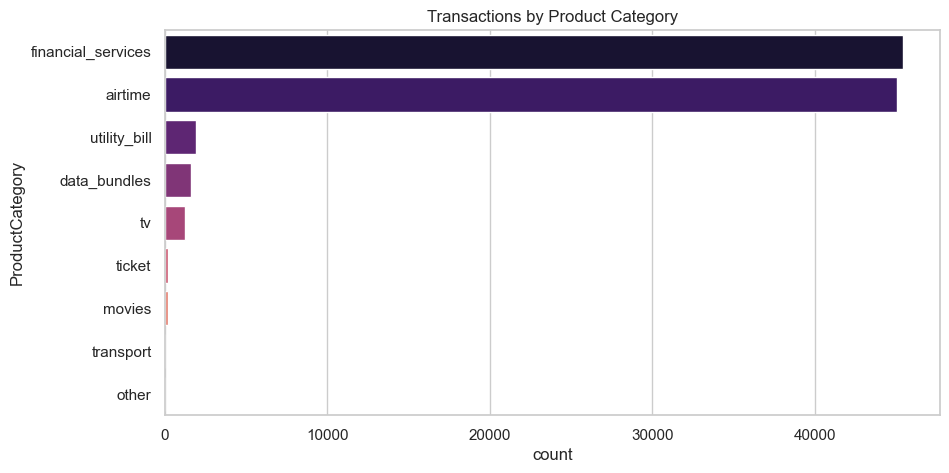

C:\Users\isaac\AppData\Local\Temp\ipykernel_8556\1674763713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, order=order, palette='magma')


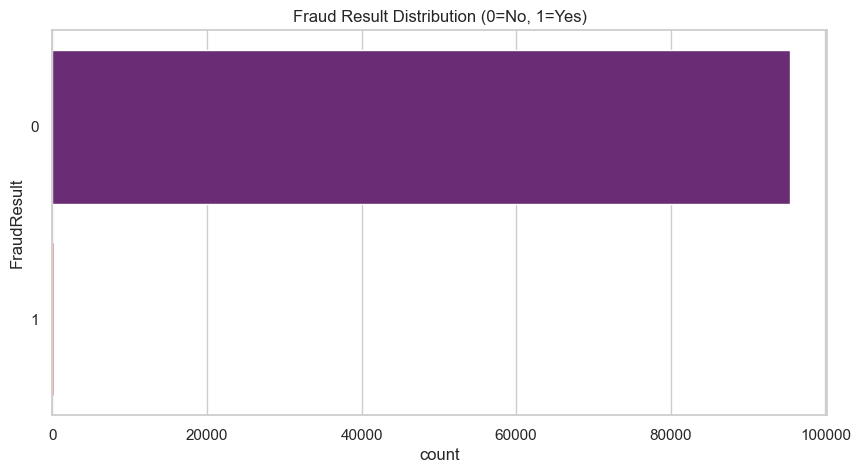

In [11]:
# Function to plot categorical counts
def plot_categorical_count(df, column, title, top_n=10):
    plt.figure(figsize=(10, 5))
    order = df[column].value_counts().iloc[:top_n].index
    sns.countplot(y=column, data=df, order=order, palette='magma')
    plt.title(title)
    plt.show()

# Visualize Key Categorical Columns
plot_categorical_count(df, 'ChannelId', 'Transactions by Channel')
plot_categorical_count(df, 'ProductCategory', 'Transactions by Product Category')
plot_categorical_count(df, 'FraudResult', 'Fraud Result Distribution (0=No, 1=Yes)')

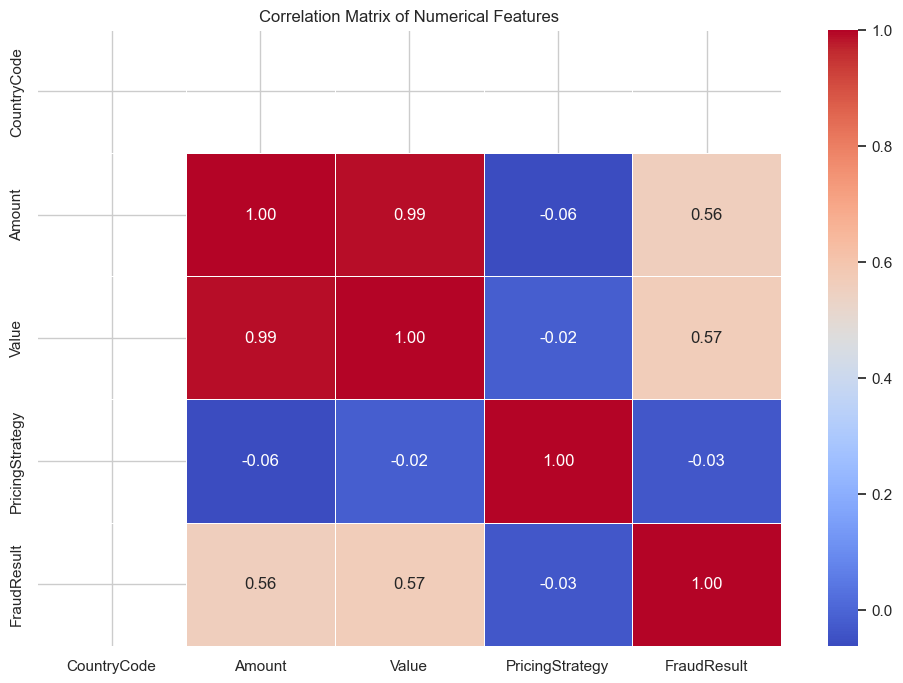

In [12]:
# Select numerical columns only
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

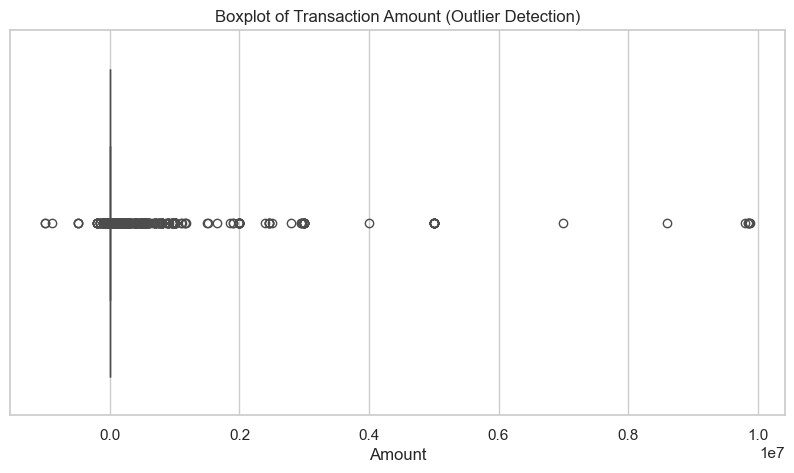

Typical Amount Range (IQR method): -4325.0 to 7075.0


In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Amount'], color='orange')
plt.title('Boxplot of Transaction Amount (Outlier Detection)')
plt.show()

# Zoom in on the central range to see the "normal" distribution better
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Typical Amount Range (IQR method): {lower_bound} to {upper_bound}")